In [73]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, HalvingRandomSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import os
import graphviz
from sklearn import tree
from sklearn.model_selection import GridSearchCV


In [ ]:
# diretorio
diretorio = r'C:\Users\Computadores Gamer\OneDrive\Área de Trabalho\mba esalq\arvores_redes_ensemble_models'
diretorio = diretorio.replace('\\','/')
os.chdir(diretorio)
os.listdir()

# Significado das váriaveis
passengerid = ID do passageiro do navio (código primário);

survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu;

pclass = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe;

name = Nome do passageiro;

sex = Gênero do passageiro, sendo masculino e feminino;

age = Idade do passageiro na data da ocorrência do naufrágio;

sibsp = Número de irmãos / cônjuges a bordo;

parch = Número de pais / filhos a bordo;

ticket = Código do ticket;

fare = Valor da passagem;

cabin = Código de identificação da Cabine;

embarked = Local ondem o passageiro embarcou no navio;

In [ ]:
np.random.seed(123)

In [35]:
# dados
dados = pd.read_excel('titanic.xlsx', sheet_name='Sheet 1')
dados = pd.DataFrame(dados)
dados.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [44]:
dados['Survived'] = dados['Survived'].replace('N', 0)
dados['Survived'] = dados['Survived'].replace('Y', 1)

dados['Sex'] = dados['Sex'].replace('female', 1)
dados['Sex'] = dados['Sex'].replace('male', 0)

dados['Embarked'] = dados['Embarked'].replace('S', 0)
dados['Embarked'] = dados['Embarked'].replace('C', 1)
dados['Embarked'] = dados['Embarked'].replace('Q', 2)


# sugestao do plantao: transformar essas variaveis acima em dummies e uma coluna pra cada categoria de cada variavel 
# lembrar de apagar a coluna original: ex: vai ficar survivedN e outra coluna survivedS
# na formula da arvore nao precisa por as duas dummies, pq a informacao é a mesma



dados.head(5)



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [45]:
# separação base treino e teste
var_x = dados[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
var_y = dados[['Survived']]

treino_x, teste_x, treino_y, teste_y = train_test_split(var_x, var_y, test_size=0.2, random_state=123)


In [64]:
# criacao da arvore
cp = 0.01
arvore = DecisionTreeClassifier (criterion='gini',
                                 ccp_alpha=cp,
                                 max_depth = 5)

In [65]:
# fit 
arvore.fit(treino_x, treino_y)


DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5)

[Text(0.5909090909090909, 0.875, 'x[1] <= 0.5\ngini = 0.475\nsamples = 712\nvalue = [435, 277]'),
 Text(0.36363636363636365, 0.625, 'x[2] <= 13.0\ngini = 0.314\nsamples = 461\nvalue = [371, 90]'),
 Text(0.18181818181818182, 0.375, 'x[3] <= 2.5\ngini = 0.473\nsamples = 26\nvalue = [10, 16]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.5454545454545454, 0.375, 'x[0] <= 1.5\ngini = 0.282\nsamples = 435\nvalue = [361, 74]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.462\nsamples = 94\nvalue = [60, 34]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.207\nsamples = 341\nvalue = [301, 40]'),
 Text(0.8181818181818182, 0.625, 'x[0] <= 2.5\ngini = 0.38\nsamples = 251\nvalue = [64, 187]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.087\nsamples = 132\nvalue = [6, 126]'),
 Text(0.9090909090909091, 0.375, 'gini = 0.5\nsamples = 119\nvalue = [58, 61]')]

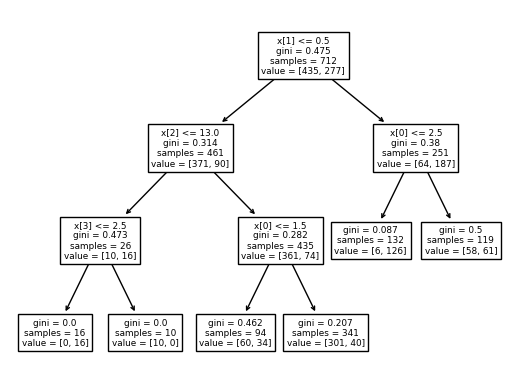

In [67]:
tree.plot_tree(arvore)

In [69]:
# avaliacao base teste
predicts = arvore.predict(teste_x)
matriz_confusao = confusion_matrix(teste_y, predicts)
acuracia_teste = accuracy_score(teste_y, predicts)
acuracia_teste

0.8156424581005587

In [138]:
# tunning ccp
limite_inf = 0.01
limite_sup = 0.001
hiperparametros = {'ccp_alpha':(limite_inf,limite_sup),
                   'max_depth':(1,10)}

grid = HalvingRandomSearchCV(estimator = arvore,
                             param_distributions= hiperparametros,
                             scoring='accuracy',
                             factor=2,
                             n_jobs=1,
                             cv=5)
grid.fit(treino_x, treino_y)


c:\Users\Computadores Gamer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Computadores Gamer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=35. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


HalvingRandomSearchCV(estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                                       max_depth=5),
                      factor=2, n_jobs=1,
                      param_distributions={'ccp_alpha': (0.01, 0.001),
                                           'max_depth': (1, 10)},
                      scoring='accuracy')

In [139]:
# melhor ccp_alpha
ccp_otimo = grid.best_params_['ccp_alpha']


In [140]:
# melhor max_depth
max_otimo = grid.best_params_['max_depth']
max_otimo

1

In [141]:
arvore2 = DecisionTreeClassifier (criterion='gini',
                                 ccp_alpha = ccp_otimo,
                                 max_depth = max_otimo)

In [142]:
# fit arvore tunada
arvore2.fit(treino_x, treino_y)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 0.5\ngini = 0.475\nsamples = 712\nvalue = [435, 277]'),
 Text(0.25, 0.25, 'gini = 0.314\nsamples = 461\nvalue = [371, 90]'),
 Text(0.75, 0.25, 'gini = 0.38\nsamples = 251\nvalue = [64, 187]')]

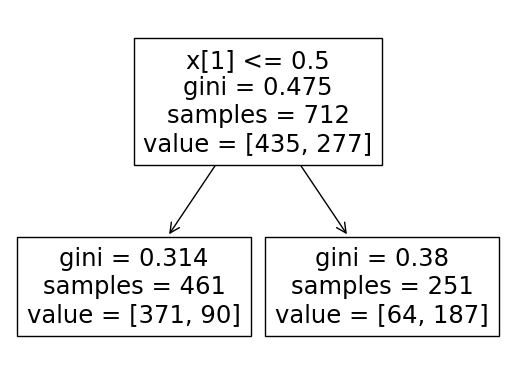

In [143]:
tree.plot_tree(arvore2)

In [144]:
# avaliacao base teste de arvore podada
predicts2 = arvore2.predict(teste_x)
matriz2 = confusion_matrix(teste_y, predicts2)
acuracia2 = accuracy_score(teste_y, predicts2) 

In [145]:
matriz2

array([[97, 17],
       [19, 46]], dtype=int64)

In [146]:
acuracia2

0.7988826815642458